Homework 7

Exercise 1. Covariance matrix calculation    (+ .pdf)

In [1]:
import numpy as np
#We calculate the covariance matrix with matricies operations
x1 = np.array([3.2, 2.4, 0.7, 1.9, 2.2, 1.2, 1.5, 2.6, 4.2, -1.5])
x2 = np.array([2.9, 6, 4.3, 3.5, 4.8, 2.1, 2.1, 4.8, 7.5, 3.5])

m1 = np.mean(x1)
m2 = np.mean(x2)
X1_m = x1 - m1
X2_m = x2 - m2

X = np.stack((X1_m, X2_m), axis=-1)
S = (X.T).dot(X)*1/len(x1)
S

array([[ 2.1424,  1.194 ],
       [ 1.194 ,  2.6325]])

Exercise 2

In [2]:
import scipy.io as sio
from scipy.stats import multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt
Dataset = sio.loadmat('HW7.mat')

train_x = Dataset['train_x']
train_y = Dataset['train_y']
test_x = Dataset['test_x']
test_y = Dataset['test_y']

In [3]:
#(a) Bayes classifier
# Estimation of the priori probabilities P(ω_1) and P(ω_2) 
N1 = np.sum(i == 1 for i in train_y)
N2= np.sum(i == 2 for i in train_y)
N = len(train_y)
P1 = N1/N #P(ω_1)
P2 = N2/N #P(ω_2)

#ML estimates of μ1,μ2,Σ1 and Σ2
m1 = np.mean(train_x[0:100,:],0)
m2 = np.mean(train_x[100:200,:],0)

#multivariate normal distribution's covariance matrices 
S1 = 1/N1*((train_x[0:100,:] - 
            np.matlib.repmat(m1,100,1)).T).dot((train_x[0:100,:] - 
                                                     np.matlib.repmat(m1,100,1)))
S2 = 1/N2*((train_x[100:200,:] - 
            np.matlib.repmat(m2,100,1)).T).dot((train_x[100:200,:] - 
                                                     np.matlib.repmat(m2,100,1)))
#(ii)
#Calculate the propabilities of each point to belong on each class.
N_test = len(test_y)
class1 =  multivariate_normal(m1,S1)
I_Bayes = class1.pdf(test_x)*P1 #I is a N-dim vector which the values: p(x_i/ω_1)*P(ω_1) for all x_is of the training set
class2 =  multivariate_normal(m2,S2)
J_Bayes = class2.pdf(test_x)*P2 #J is similar to I but for class ω_2 (values of p(x_i/ω_2)*P(ω_2))

#Classify the samples of the test set
Btest_y = np.zeros((N_test,1)) # Create a vector for storing the labels of the samples of the test set

Btest_y[I_Bayes > J_Bayes] = 1
Btest_y[I_Bayes < J_Bayes] = 2

#(iii)
#Error Estimation
#The percentage of points that have been classified to the wrong class.
Error_Bayes = (np.sum(i==1 for i in Btest_y != test_y))/N_test
print('Bayes classifier error: ', Error_Bayes[0])

Bayes classifier error:  0.15


In [4]:
#(b) naïve Bayes classifier
#(i)
m1_class1 = m1[0]
m2_class1 = m1[1]
m1_class2 = m2[0]
m2_class2 = m2[1]

var1_class1 = S1[0,0]
var2_class1 = S1[1,1]
var1_class2 = S2[0,0]
var2_class2 = S2[1,1]

norm1_class1 = norm(m1_class1,var1_class1)
norm2_class1 = norm(m2_class1,var2_class1)
norm1_class2 = norm(m1_class2,var1_class2)
norm2_class2 = norm(m2_class2,var2_class2)

I_Naive_Bayes = np.multiply(norm1_class1.pdf(test_x[:,0]), norm2_class1.pdf(test_x[:,1])) * P1
J_Naive_Bayes = np.multiply(norm1_class2.pdf(test_x[:,0]), norm2_class2.pdf(test_x[:,1])) * P2

#(ii)
#Classify the samples of the test set
N_test = len(test_y)
Btest_y = np.zeros((N_test,1))

Btest_y[I_Naive_Bayes > J_Naive_Bayes] = 1
Btest_y[I_Naive_Bayes < J_Naive_Bayes] = 2

#(iii)
#Error Estimation
#The percentage of points that have been classified to the wrong class.
Error_Naive_Bayes = (np.sum(i==1 for i in Btest_y != test_y))/N_test
print('Naive Bayes classifier error: ', Error_Naive_Bayes[0])

Naive Bayes classifier error:  0.25


In [5]:
#(c) minimum Euclidean distance classifier
#(i)
#calculate  the Euclidean distance of each point from each class
I_eucl_dist = pow(pow(test_x[:,0] - m1_class1,2) + pow(test_x[:,1] - m2_class1,2), (1/2))
J_eucl_dist = pow(pow(test_x[:,0] - m1_class2,2) + pow(test_x[:,1] - m2_class2,2), (1/2))

#(ii) Classify each point to the nearest class' mean
Btest_y = np.zeros((N_test,1)) 
Btest_y[I_eucl_dist > J_eucl_dist] = 2
Btest_y[I_eucl_dist < J_eucl_dist] = 1

#(iii)
#Error Estimation
#The percentage of points that have been classified to the wrong class.
Error_EuclideanDist = (np.sum(i==1 for i in Btest_y != test_y))/N_test
print('Euclidean Distance classifier error: ', Error_EuclideanDist[0])


Euclidean Distance classifier error:  0.16


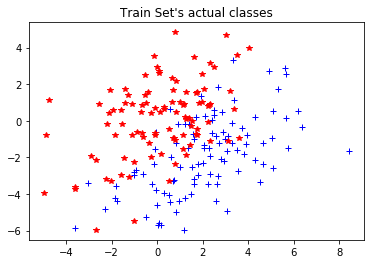

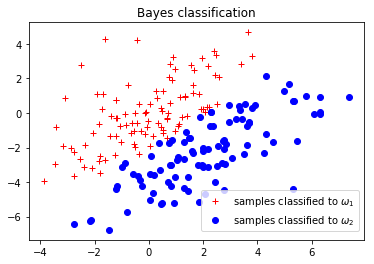

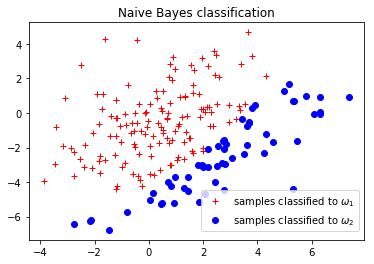

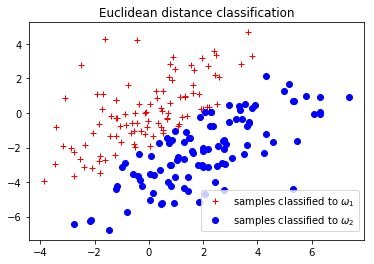

In [6]:
#(d)

#An insight on the training set
plt.plot(train_x[100:200,0],train_x[100:200,1],'b+')
plt.plot(train_x[0:100,0],train_x[0:100,1],'r*')
plt.title('Train Set\'s actual classes')
plt.show()

#Bayes classification
plt.plot(test_x[I_Bayes > J_Bayes, 0],test_x[I_Bayes > J_Bayes, 1],'r+',label='samples classified to $\omega_1$')
plt.plot(test_x[I_Bayes < J_Bayes, 0],test_x[I_Bayes < J_Bayes, 1],'bo',label='samples classified to $\omega_2$')
plt.title('Bayes classification')
plt.legend(bbox_to_anchor=(0.5, .15, .5, .102))
plt.show()

#Naive Bayes Classification
plt.plot(test_x[I_Naive_Bayes > J_Naive_Bayes, 0],test_x[I_Naive_Bayes > J_Naive_Bayes, 1],'r+',label='samples classified to $\omega_1$')
plt.plot(test_x[I_Naive_Bayes < J_Naive_Bayes, 0],test_x[I_Naive_Bayes < J_Naive_Bayes, 1],'bo',label='samples classified to $\omega_2$')
plt.title('Naive Bayes classification')
plt.legend(bbox_to_anchor=(0.5, .15, .5, .102))
plt.show()

#Euclidean distance classification
plt.plot(test_x[I_eucl_dist < J_eucl_dist, 0],test_x[I_eucl_dist < J_eucl_dist, 1],'r+',label='samples classified to $\omega_1$')
plt.plot(test_x[I_eucl_dist > J_eucl_dist, 0],test_x[I_eucl_dist > J_eucl_dist, 1],'bo',label='samples classified to $\omega_2$')
plt.title('Euclidean distance classification')
plt.legend(bbox_to_anchor=(0.5, .15, .5, .102))
plt.show()

(D)

Bayes classifier error:  0.15

Naive Bayes classifier error:  0.25

Euclidean Distance classifier error:  0.16

We observe that in the normally distributed classes case the Bayes classifier achieves the smallest classification error.

On the other hand, the Naive Bayes classifier has a bigger error because the two feutures are not independent(the Covariance matricies are not diagonal), so we 'loose' some useful information.

The non-parametric euclidean distance classifier achieves a very good score by seperating the decision surface linearly.

Because the covariance matricies of the two classes are almost equal, the decision surface of the Bayes classifier is (almost) linear.
That's why Bayes_Error is almost equal to Euclidean_Distance_Error.

From the figures above we can easily interpret the results of each classifier.